In [52]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'

In [53]:
# %matplotlib widget

In [54]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import gc
from BBP_RTQC_global_vars import *
from BBP_RTQC_paths import *
import os
import subprocess
import pandas as pd
import cartopy.crs as ccrs


In [55]:
def robstd(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [56]:
# find all pickled results
fn_pkl = glob.glob("plots/*/*pkl") # MDQC3_HDV700
# fn_pkl = glob.glob("plots/*/*pkl.MDQC3_HDV400")
# fn_pkl = glob.glob("plots/*/*pkl.MDQC2_HDV400")

all_PROFS = []
for fn in fn_pkl:
    print(fn)
    infile = open(fn,'rb')
    tmp_all_PROFS = pickle.load(infile)
    infile.close()
    
    all_PROFS.extend(tmp_all_PROFS)


plots/5905376/aoml_BD5905376.pkl
plots/6903093/coriolis_BR6903093.pkl
plots/2902120/incois_BR2902120.pkl
plots/5906296/aoml_BR5906296.pkl
plots/5906031/aoml_BR5906031.pkl
plots/6903550/coriolis_BR6903550.pkl
plots/6902743/coriolis_BD6902743.pkl
plots/2902114/incois_BD2902114.pkl
plots/6901649/coriolis_BD6901649.pkl
plots/6901656/coriolis_BR6901656.pkl
plots/6901511/coriolis_BD6901511.pkl
plots/6901866/coriolis_BD6901866.pkl
plots/6903570/coriolis_BR6903570.pkl
plots/5906307/aoml_BR5906307.pkl
plots/6901183/bodc_BR6901183.pkl
plots/7900561/coriolis_BR7900561.pkl
plots/2902753/csio_BR2902753.pkl
plots/5906226/aoml_BR5906226.pkl
plots/2902241/incois_BR2902241.pkl
plots/6901860/coriolis_BR6901860.pkl
plots/5906450/aoml_BR5906450.pkl
plots/5904671/aoml_BD5904671.pkl
plots/6901580/coriolis_BD6901580.pkl
plots/6902549/coriolis_BR6902549.pkl
plots/2902205/incois_BR2902205.pkl
plots/2902195/incois_BR2902195.pkl
plots/5904478/aoml_BD5904478.pkl
plots/5904858/aoml_BD5904858.pkl
plots/4903625/aoml

plots/6901529/coriolis_BD6901529.pkl
plots/6901489/coriolis_BD6901489.pkl
plots/2903392/jma_BR2903392.pkl
plots/6903706/coriolis_BR6903706.pkl
plots/5904847/aoml_BR5904847.pkl
plots/7900591/coriolis_BR7900591.pkl
plots/6901519/coriolis_BD6901519.pkl
plots/6902828/coriolis_BD6902828.pkl
plots/5904470/aoml_BD5904470.pkl
plots/2902089/incois_BR2902089.pkl
plots/6902024/coriolis_BR6902024.pkl
plots/5906244/aoml_BR5906244.pkl
plots/5906294/aoml_BR5906294.pkl
plots/2902093/incois_BR2902093.pkl
plots/6904117/coriolis_BR6904117.pkl
plots/2902209/incois_BR2902209.pkl
plots/2902088/incois_BR2902088.pkl
plots/6901480/coriolis_BD6901480.pkl
plots/6902544/coriolis_BR6902544.pkl
plots/5904857/aoml_BD5904857.pkl
plots/6903577/coriolis_BR6903577.pkl
plots/2902115/incois_BR2902115.pkl
plots/5905636/aoml_BD5905636.pkl
plots/6902826/coriolis_BR6902826.pkl
plots/5906293/aoml_BR5906293.pkl
plots/2902272/incois_BR2902272.pkl
plots/5905988/aoml_BR5905988.pkl
plots/5905104/aoml_BR5905104.pkl
plots/2902299/inc

plots/2902215/incois_BR2902215.pkl
plots/5905102/aoml_BR5905102.pkl
plots/5904859/aoml_BR5904859.pkl
plots/6901768/coriolis_BD6901768.pkl
plots/6901515/coriolis_BD6901515.pkl
plots/5906623/csiro_BR5906623.pkl
plots/5905135/aoml_BR5905135.pkl
plots/5906339/aoml_BR5906339.pkl
plots/6901862/coriolis_BD6901862.pkl
plots/6901772/coriolis_BR6901772.pkl
plots/5904882/csiro_BD5904882.pkl
plots/6902896/coriolis_BR6902896.pkl
plots/6903125/coriolis_BR6903125.pkl
plots/5906343/aoml_BR5906343.pkl
plots/5905134/aoml_BR5905134.pkl
plots/7900559/coriolis_BR7900559.pkl
plots/4901804/coriolis_BD4901804.pkl
plots/6901491/coriolis_BD6901491.pkl
plots/5905994/aoml_BR5905994.pkl
plots/5906319/aoml_BR5906319.pkl
plots/5906208/aoml_BR5906208.pkl
plots/5905133/aoml_BR5905133.pkl
plots/6903024/coriolis_BR6903024.pkl
plots/6901767/coriolis_BD6901767.pkl
plots/2902087/incois_BD2902087.pkl
plots/6902742/coriolis_BR6902742.pkl
plots/6901522/coriolis_BD6901522.pkl
plots/5904182/aoml_BD5904182.pkl
plots/5906026/aoml

In [57]:
tests.keys()

dict_keys(['A', 'A2', 'B', 'C', 'E', 'G'])

In [58]:
# extract all profiles from list of dictionaries (https://stackoverflow.com/questions/7271482/getting-a-list-of-values-from-a-list-of-dicts) 
# "Nan" is an optional value to return if the specified key does not exist. https://www.w3schools.com/python/ref_dictionary_get.asp
a = [d.get("PRES", "NaN") for d in all_PROFS if 'PRES' in d]
all_PRES = np.asarray(np.hstack(a), dtype=np.float16)

a = [d.get("BBP700", "NaN") for d in all_PROFS if 'BBP700' in d]
all_BBP700 = np.asarray(np.hstack(a))

a = [d.get("BBP700_QC_flag", "NaN") for d in all_PROFS if 'BBP700_QC_flag' in d]
all_BBP700_QC_flag = np.asarray(np.hstack(a), dtype=np.uint8)

a = [d.get("BBP700_QC_1st_failed_test", "NaN") for d in all_PROFS ]#if 'BBP700_QC_1st_failed_test' in d]
all_BBP700_1st_fail = np.asarray(np.hstack(a))

all_fail = dict.fromkeys(tests.keys())
for ikey in all_fail.keys():
    a = [d.get(ikey, "NaN") for d in all_BBP700_1st_fail if ikey in d]
    all_fail[ikey] = np.asarray(np.hstack(a))


In [59]:
# prof = all_PROFS[0]
# prof['PRES'].max()

In [60]:
all_WMO = [];
all_LAT = [];
all_LON = [];
all_SENSOR_MODEL = [];
all_maxPRES = []
# all_SENSOR_MAKER = [];
all_DK = [];
all_S = [];
all_KHI = []

iprof = 0
iTotNoProf = 0
for prof in all_PROFS:
    if "iWMO" in prof: # this is the last record of this float
#         ipdb.set_trace()
        all_WMO.extend([ prof['iWMO'] ]*iprof) # NOTE: the "*" operation creates iprof elements of the LIST 
        if type(prof['SENSOR_MODEL'])==str:
            all_SENSOR_MODEL.extend([ prof['SENSOR_MODEL'].strip() ]*iprof)
        else:
            all_SENSOR_MODEL.extend([ prof['SENSOR_MODEL'].item().strip() ]*iprof)
#         all_SENSOR_MAKER.extend([ prof['SENSOR_MODEL'] ]*iprof)
        all_DK.extend([ prof['DARK_BACKSCATTERING700'] ]*iprof)
        all_S.extend([ prof['SCALE_BACKSCATTERING700'] ]*iprof)
        all_KHI.extend([ prof['KHI_BACKSCATTERING700'] ]*iprof)
        iprof = 0
    else:
        all_LAT.extend([ prof['LAT'] ]*len(prof['PRES']))
        all_LON.extend([ prof['LON'] ]*len(prof['PRES']))
        all_maxPRES.extend([ prof['PRES'].max() ]*len(prof['PRES']))
        
        iprof = iprof + len(prof['PRES']) # this is to count how many BBP values there are for each profile

all_WMO = np.asarray(all_WMO)   
all_SENSOR_MODEL = np.asarray(all_SENSOR_MODEL)   
# # all_SENSOR_MAKER = np.asarray(all_SENSOR_MODEL)   
# # all_SENSOR_SERIAL_NO = np.asarray(all_SENSOR_MODEL)   
all_maxPRES = np.asarray(all_maxPRES, dtype=np.float16)
all_DK = np.asarray(all_DK, dtype=np.float16)
all_S = np.asarray(all_S)
all_KHI = np.asarray(all_KHI, dtype=np.float16)

all_LAT = np.asarray(all_LAT, dtype=np.float16) 
all_LON = np.asarray(all_LON, dtype=np.float16) 

In [61]:
len(all_PROFS)

91439

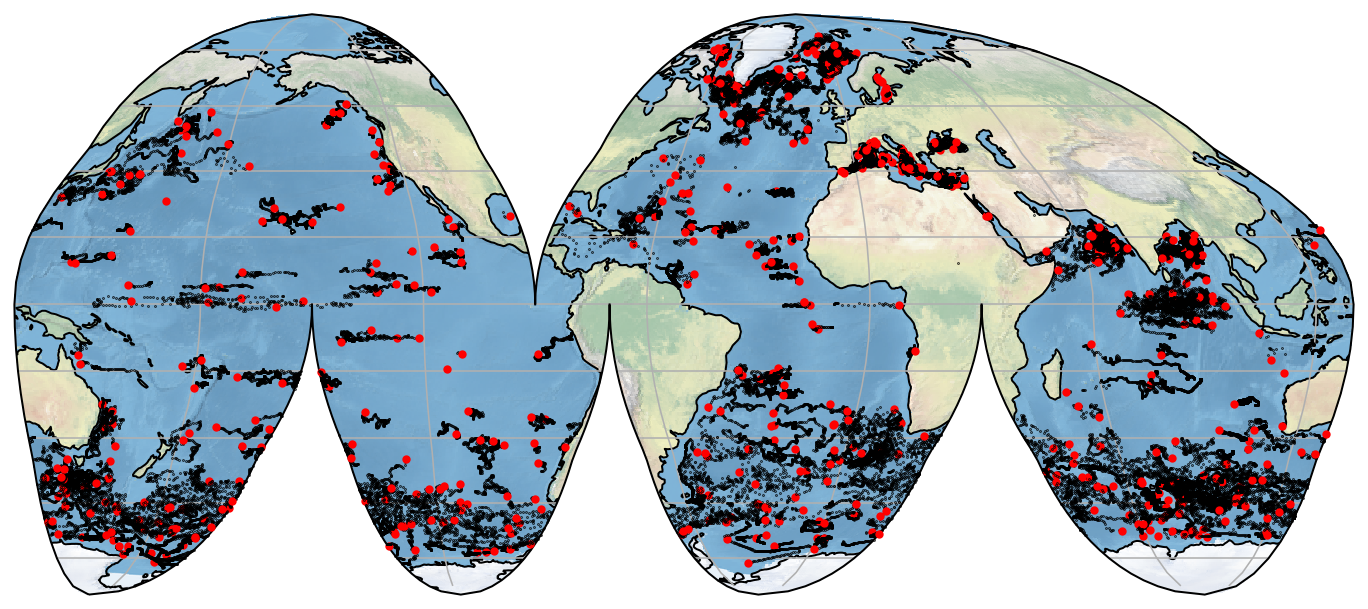

In [117]:
import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.InterruptedGoodeHomolosine(central_longitude=-50, globe=None))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=200, globe=None))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=200))

ax.set_global()

ax.stock_img()
ax.coastlines()


# ax.coastlines(resolution='110m')
# ax.add_feature(cfeature.LAND, color='grey')
ax.gridlines()


for prof in all_PROFS[::1]:
    if "iWMO" not in prof: 
        ax.scatter(prof['LON'], prof['LAT'], transform=ccrs.PlateCarree(), c='k', s=0.1, zorder=60)
        last_LAT = prof['LAT']
        last_LON = prof['LON']
    elif "iWMO" in prof: # this is the last record of this float
        ax.scatter(last_LON, last_LAT, transform=ccrs.PlateCarree(), c='r', s=10, zorder=60)



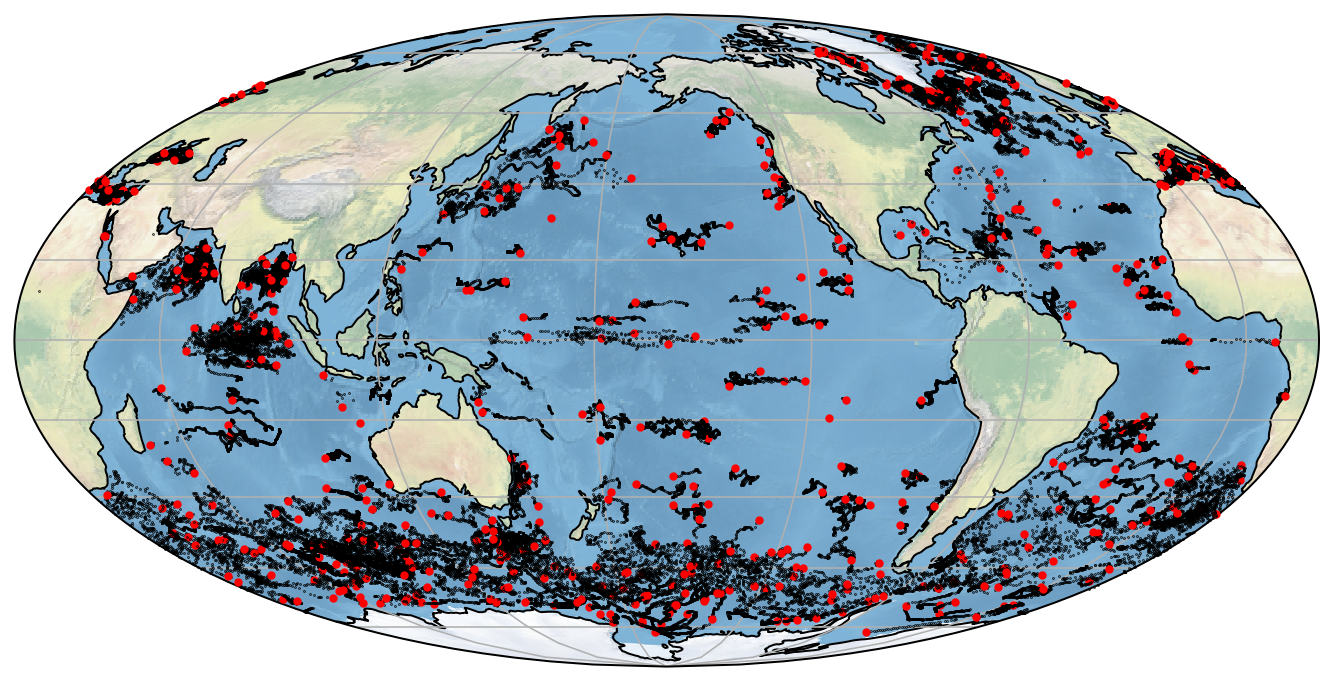

In [119]:
import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,6))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.InterruptedGoodeHomolosine(central_longitude=-50, globe=None))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=200, globe=None))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=200))

ax.set_global()

ax.stock_img()
ax.coastlines()


# ax.coastlines(resolution='110m')
# ax.add_feature(cfeature.LAND, color='grey')
ax.gridlines()


for prof in all_PROFS[::1]:
    if "iWMO" not in prof: 
        ax.scatter(prof['LON'], prof['LAT'], transform=ccrs.PlateCarree(), c='k', s=0.1, zorder=60)
        last_LAT = prof['LAT']
        last_LON = prof['LON']
    elif "iWMO" in prof: # this is the last record of this float
        ax.scatter(last_LON, last_LAT, transform=ccrs.PlateCarree(), c='r', s=10, zorder=60)

